In [443]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

TASK 1

Hi there,

As per voicemail, please find the 3 datasets attached from Sprocket Central Pty Ltd:

1) Customer Demographic 
2) Customer Addresses
3) Transaction data in the past three months

Can you please review the data quality to ensure that it is ready for our analysis in phase two. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.

I’ve also attached a data quality framework as a guideline. Let me know if you have any questions.

Thanks for your help.

Kind Regards
Your Manager

In [444]:
xls = pd.ExcelFile("KPMG_VI_New_raw_data_update_final.xlsx")
txn_df = pd.read_excel(xls, 'Transactions', skiprows=[0], usecols="A:M")
newcus_df = pd.read_excel(xls, 'NewCustomerList', skiprows=[0], usecols="A:P")
cusdemo_df = pd.read_excel(xls, 'CustomerDemographic', skiprows=[0], usecols="A:M")
cusaddr_df = pd.read_excel(xls, 'CustomerAddress', skiprows=[0], usecols="A:F")

In [445]:
txn_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [446]:
len(txn_df[txn_df.isnull().any(axis=1)]) / len(txn_df)

0.02775

In [447]:
# we found that num of row containing >0 NaN is less than 3% of the dataset, thus we just remove them
txn_df = txn_df.dropna()

In [448]:
newcus_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9


In [449]:
newcus_df.isnull().sum(axis=0)

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64

In [450]:
# as the all the data are categorical, we replace the nan value using the most frequent stategy
imp = SimpleImputer(strategy="most_frequent")
attributes = newcus_df.columns
newcus_df = imp.fit_transform(newcus_df)
newcus_df = pd.DataFrame(newcus_df, columns=attributes)

In [451]:
set(newcus_df.gender)

{'Female', 'Male', 'U'}

In [452]:
cusdemo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
1,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0
2,1888,Sibyl,Scholtz,Female,67,2002-01-26,Food Chemist,Health,Mass Customer,N,NaN,Yes,1.0
3,3435,Stevena,Allcock,Female,80,2002-01-15,Senior Editor,NaN,Affluent Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0
4,2858,Benedicto,Radki,Male,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,N,testâ testâ«,Yes,1.0


In [453]:
# default column is full of messy code, drop it
cusdemo_df = cusdemo_df.drop(columns=['default'])

# drop 1843 as it is obviously an outlier
cusdemo_df = cusdemo_df.drop([0])

In [454]:
cusdemo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,No,1.0
2,1888,Sibyl,Scholtz,Female,67,2002-01-26,Food Chemist,Health,Mass Customer,N,Yes,1.0
3,3435,Stevena,Allcock,Female,80,2002-01-15,Senior Editor,NaN,Affluent Customer,N,No,1.0
4,2858,Benedicto,Radki,Male,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,N,Yes,1.0
5,422,Vito,Norker,Male,78,2002-01-06,NaN,Manufacturing,Affluent Customer,N,No,1.0


In [455]:
cusdemo_df.isnull().sum(axis=0)

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [456]:
# fill tenure NaN with median, and most frequent stategy for categorical data
cusdemo_df['tenure'] = cusdemo_df['tenure'].fillna(cusdemo_df['tenure'].median())
imp = SimpleImputer(strategy="most_frequent")
attributes = cusdemo_df.columns
cusdemo_df = imp.fit_transform(cusdemo_df)
cusdemo_df = pd.DataFrame(cusdemo_df, columns=attributes)

In [457]:
set(cusdemo_df.gender)

{'F', 'Femal', 'Female', 'M', 'Male', 'U'}

In [458]:
# inconsistant attribute name
cusdemo_df.gender = cusdemo_df.gender.replace(['Femal', 'F'], 'Female')
cusdemo_df.gender = cusdemo_df.gender.replace(['M'], 'Male')

set(cusdemo_df.gender)

{'Female', 'Male', 'U'}

In [459]:
cusaddr_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [460]:
cusaddr_df.isnull().sum(axis=0)

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [461]:
print(set(cusaddr_df.state))
print(set(cusaddr_df.country))

{'New South Wales', 'VIC', 'Victoria', 'NSW', 'QLD'}
{'Australia'}


In [462]:
# rename attributes for state
cusaddr_df.state = cusaddr_df.state.replace('New South Wales', 'NSW')
cusaddr_df.state = cusaddr_df.state.replace('Victoria', 'VIC')

set(df4.state)

{'NSW', 'QLD', 'VIC'}

In [464]:
# save the clean data to xlsx
writer = pd.ExcelWriter('KPMG_clean_data.xlsx', engine='xlsxwriter')
txn_df.to_excel(writer, sheet_name='Transactions', index=False)
newcus_df.to_excel(writer, sheet_name='NewCustomerList', index=False)
cusdemo_df.to_excel(writer, sheet_name='CustomerDemographic', index=False)
cusaddr_df.to_excel(writer, sheet_name='CustomerAddress', index=False)

writer.save()

TASK 2

For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration;  Model Development and Interpretation.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

In [544]:
xls = pd.ExcelFile("KPMG_clean_data.xlsx")

txn_df = pd.read_excel(xls, 'Transactions', usecols="A:M")
newcus_df = pd.read_excel(xls, 'NewCustomerList', usecols="A:P")
cusdemo_df = pd.read_excel(xls, 'CustomerDemographic', usecols="A:M")
cusaddr_df = pd.read_excel(xls, 'CustomerAddress', usecols="A:F")

In [545]:
# only approved order will be informative
txn_df = txn_df[txn_df.order_status == 'Approved']
txn_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226


In [546]:
txn_record = txn_df.groupby('customer_id').size()
txn_record = pd.DataFrame({'customer_id': txn_record.index, 'order_sum': txn_record.values})

In [547]:
# join useful columns
df_train = cusdemo_df.join(cusaddr_df.set_index('customer_id'), on='customer_id')
df_train = df_train.join(txn_record.set_index('customer_id'), on='customer_id')
# bin DOB into years
df_train['year'] = df_train.DOB.dt.year
# dead people are excluded
df_train = df_train[df_train.deceased_indicator == 'N']
attributes = ['gender', 'past_3_years_bike_related_purchases', 'year', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'postcode', 'property_valuation', 'order_sum']
df_train = df_train[attributes]

# fillna for order_sum
df_train.order_sum = df_train.order_sum.fillna(0)

df_train.head()

,gender,past_3_years_bike_related_purchases,year,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,property_valuation,order_sum
0,Male,46,2002,Account Executive,Argiculture,High Net Worth,No,1,2217.0,10.0,4.0
1,Female,67,2002,Food Chemist,Health,Mass Customer,Yes,1,2042.0,10.0,4.0
2,Female,80,2002,Senior Editor,Manufacturing,Affluent Customer,No,1,4301.0,3.0,5.0
3,Male,4,2002,Recruiting Manager,Manufacturing,Mass Customer,Yes,1,2044.0,10.0,4.0
4,Male,78,2002,Business Systems Development Analyst,Manufacturing,Affluent Customer,No,1,2031.0,11.0,4.0


In [548]:
df_train.isnull().sum(axis=0)

gender                                 0
past_3_years_bike_related_purchases    0
year                                   0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
postcode                               4
property_valuation                     4
order_sum                              0
dtype: int64

In [549]:
# fillna with the most frequent strategy
imp = SimpleImputer(strategy="most_frequent")
attributes = df_train.columns
df_train = imp.fit_transform(df_train)
df_train = pd.DataFrame(df_train, columns=attributes)

In [550]:
enc = OneHotEncoder(handle_unknown='ignore')
oh_attr = enc.fit_transform(df_train[['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car']]).toarray()
np_train = df_train[['past_3_years_bike_related_purchases', 'year', 'tenure', 'postcode', 'property_valuation']].to_numpy()
np_train = np.concatenate((oh_attr, np_train), axis=1)
np_train

array([[0.0, 1.0, 0.0, ..., 1, 2217.0, 10.0],
       [1.0, 0.0, 0.0, ..., 1, 2042.0, 10.0],
       [1.0, 0.0, 0.0, ..., 1, 4301.0, 3.0],
       ...,
       [0.0, 0.0, 1.0, ..., 11, 2096.0, 9.0],
       [0.0, 0.0, 1.0, ..., 11, 3106.0, 10.0],
       [0.0, 0.0, 1.0, ..., 11, 2540.0, 6.0]], dtype=object)

Test set:

In [551]:
attributes = ['gender', 'past_3_years_bike_related_purchases', 'year', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'postcode', 'property_valuation']
newcus_df['year'] = newcus_df.DOB.dt.year
df_test = newcus_df[newcus_df.deceased_indicator == 'N']
df_test = df_test[attributes]
df_test.head()

,gender,past_3_years_bike_related_purchases,year,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,property_valuation
0,Male,86,1957,General Manager,Manufacturing,Mass Customer,Yes,14,4500,6
1,Male,69,1970,Structural Engineer,Property,Mass Customer,No,16,2113,11
2,Female,10,1974,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,3505,5
3,Female,64,1979,Account Representative III,Manufacturing,Affluent Customer,Yes,5,4814,1
4,Female,34,1965,Financial Analyst,Financial Services,Affluent Customer,No,19,2093,9


In [552]:
oh_attr = enc.transform(df_test[['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car']]).toarray()
np_test = df_test[['past_3_years_bike_related_purchases', 'year', 'tenure', 'postcode', 'property_valuation']].to_numpy()
np_test = np.concatenate((oh_attr, np_test), axis=1)
np_test

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 1.400e+01, 4.500e+03,
        6.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.600e+01, 2.113e+03,
        1.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+01, 3.505e+03,
        5.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.500e+01, 4.702e+03,
        2.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.900e+01, 4.215e+03,
        2.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.400e+01, 2.010e+03,
        9.000e+00]])

In [578]:
X_train = np_train
y_train = df_train['order_sum']
X_test = np_test
reg = LinearRegression()
reg.fit(X_train, y_train)
predicts = reg.predict(X_test)

df_test['order_sum'] = np.round(predicts, 0)

In [580]:
# calculate the mean square error for train set
mean_squared_error(reg.predict(X_train), y_train)

7.479326061772165

(array([ 15.,   0., 206.,   0., 635.,   0., 116.,   0.,  25.,   3.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

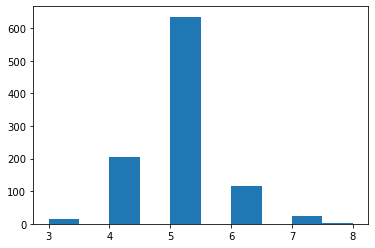

In [581]:
predicts = np.round(predicts, 0)
plt.hist(predicts)

In [582]:
df_test[df_test.order_sum > 5].sort_values(by='order_sum', ascending=False)

,gender,past_3_years_bike_related_purchases,year,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,property_valuation,order_sum
430,Male,23,1974,Research Assistant IV,Argiculture,Mass Customer,Yes,4,2140,8,8.0
476,Female,25,1972,Administrative Assistant II,Entertainment,Mass Customer,No,16,3149,10,8.0
690,Female,53,1992,Administrative Assistant II,Financial Services,Affluent Customer,Yes,5,3216,8,8.0
553,Female,55,1958,Developer I,Financial Services,Affluent Customer,No,17,2322,6,7.0
821,Male,70,1978,Budget/Accounting Analyst III,Manufacturing,Affluent Customer,No,17,3174,8,7.0
...,...,...,...,...,...,...,...,...,...,...,...
378,Female,34,1974,Nuclear Power Engineer,Manufacturing,Affluent Customer,No,14,3199,6,6.0
364,Female,62,1999,Computer Systems Analyst II,Financial Services,Mass Customer,Yes,15,2323,4,6.0
360,U,71,1941,Programmer II,IT,Mass Customer,Yes,11,3030,7,6.0
343,Female,22,1939,VP Marketing,Manufacturing,Mass Customer,Yes,16,4075,10,6.0


In [585]:
df_train.to_excel("feat_data.xlsx",sheet_name='feat_data', index=False)  